# Histograms and Pixel Intensity Transformations

Histograms display the intensity of pixels on an image. Intensity Transformations (adjusting brightness, contrast, etc.) are operations on these individual pixel intensities to make objects in an image easier to see.

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Helper side-by-side image plotting function
def plot_side_by_side(img1, img2, title1='Original', title2='New Image'):
    plt.figure(img_size=(6,6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(title1)
    plt.subplot(122)
    plt.imshow(img2)
    plt.title(title2)
    plt.show()

In [7]:
# Helper side-by-side histogram plotting function
def plot_histogram(img1, img2, title1='Original', title2='New Image'):
    intensity_vals = np.array([x for x in range(256)])
    plt.subplot(121)
    plt.bar(intensity_vals, cv2.calcHist([img1], [0], None, [256], [0,256])[:,0], width=5)
    plt.xlabel('intensity')
    plt.title(title1)
    plt.subplot(122)
    plt.bar(intensity_vals, cv2.calcHist([img1], [0], None, [256], [0,256])[:,0], width=5)
    plt.xlabel('intensity')
    plt.title(title2)
    plt.show()

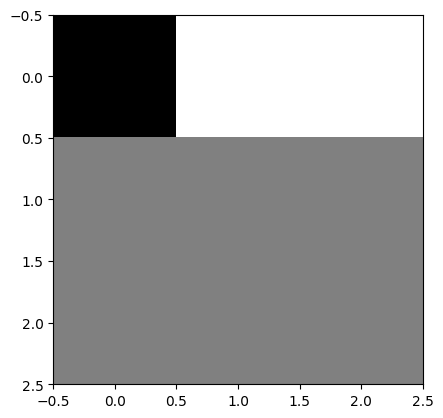

Sample image:
 [[0 2 2]
 [1 1 1]
 [1 1 1]]


In [37]:
sample_img = np.array([[0,2,2], [1,1,1], [1,1,1]], dtype=np.uint8)

plt.imshow(sample_img, cmap='gray')
plt.show()
print('Sample image:\n', sample_img)

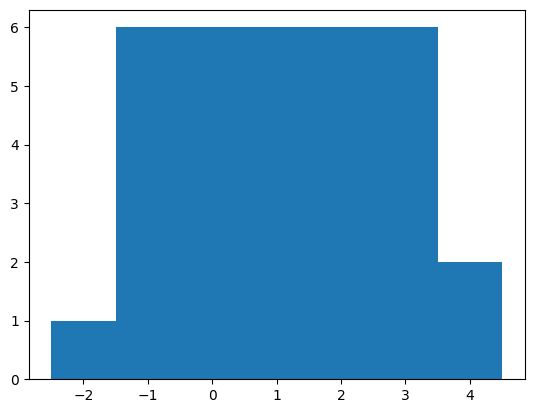

In [70]:
hist = cv2.calcHist([sample_img], [0], None, [3], [0,3])
intensity_vals = np.array([x for x in range(3)])

plt.bar(intensity_vals, hist[:,0], width=5)
plt.show()


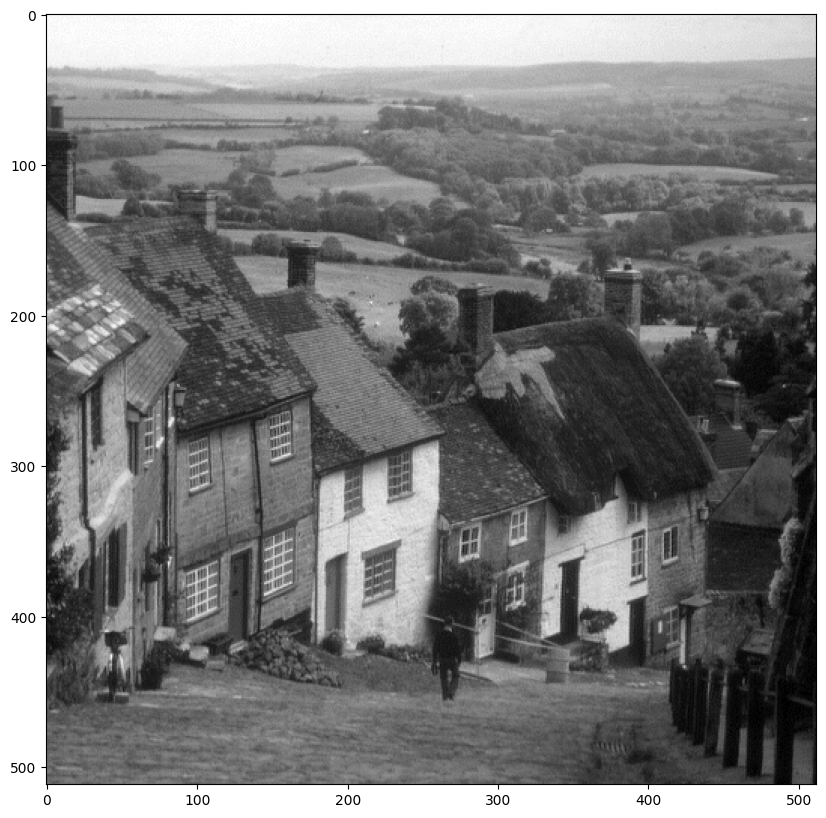

In [60]:
goldhill = cv2.imread('imgs/goldhill.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,10))
plt.imshow(goldhill, cmap='gray')
plt.show()

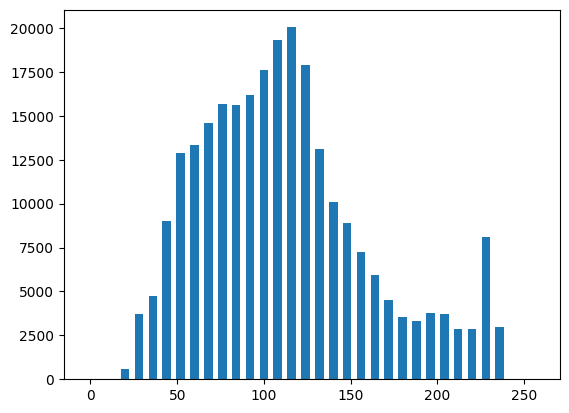

In [64]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
intensity_vals = np.array([x for x in range(hist.shape[0])])

plt.bar(intensity_vals, hist[:,0], width=5)
plt.show()